# 3 Kernelized (Ridge) Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as sLA
from PIL import Image #for importing the .png file
%matplotlib inline

In [2]:
im_frame = Image.open('cc_90.png')
np_frame = np.array(im_frame.getdata())
y=np_frame[np_frame!=0]

In [3]:
xx,yy=np.meshgrid(np.arange(250),np.arange(338))
coord=np.vstack((xx.ravel(),yy.ravel())).T
X=coord[np_frame!=0]

(-0.5, 249.5, 337.5, -0.5)

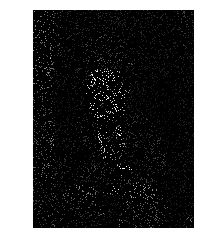

In [4]:
#display the image
plt.gray()
plt.imshow(np_frame.reshape((338,250)))
plt.axis('off')

In [5]:
def distanceSquaredMatrix(A,B):
    return np.sum(np.square(A[:,None]-B),axis=2)

In [6]:
#kernel function
def K(X1,X2,sig=5):
    dist=distanceSquaredMatrix(X1,X2)
    kernel=np.zeros(dist.shape)
    cutoff=2*sig*np.log(10) #0 when kernel function would be smaller than 0.01
    kernel[dist<cutoff]=np.exp(-dist[dist<cutoff]/(2*sig))
    return kernel


In [7]:
def buildG(X,sig=2):
    return sp.csc_matrix(K(X,X,sig))

In [10]:
G=buildG(X)

In [15]:
def buildAlpha(G,tau):
    '''
    calculates a NxN matrix. if multiplied with y^T it becomes the alpha from the exercise
    '''
    N=G.shape[0]
    return (G+tau*sp.identity(N,format='csc'))
def newRegressed(Xnew,X,y,alpha):
    '''
    Xnew: numpy.ndarray of new features
    X: numpy.ndarray used to build G
    y: numpy.ndarray labels of X
    G: numpy.ndarray Gram matrix
    tau: regularization parameter
    returns numpy.ndarray with regressed values for Xnew
    '''
    #calculate kappa
    kappa=K(X,Xnew)
    psi=sLA.spsolve(alpha,kappa)
    
    return y.T@psi

In [12]:
alpha=buildAlpha(G,1)

In [43]:
yReg=[]
#stepwise calculation because we had memory problems
steps=400
for i in range(int(np.ceil(len(coord[np_frame==0])/steps))):
    yReg.append(newRegressed(coord[np_frame==0][i*steps:(i+1)*steps],X,y,alpha))
    print('%i values calculated'%(steps*(i+1)),end='\r')
yReg=np.concatenate(yReg).ravel()

In [51]:
yFinal=np.zeros(np_frame.shape)
yFinal[np_frame!=0]=y
yFinal[np_frame==0]=np.concatenate(yReg).ravel()

(-0.5, 249.5, 337.5, -0.5)

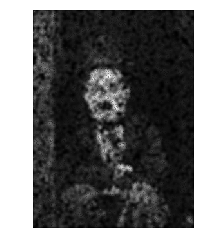

In [52]:
#display the final image
plt.gray()
plt.imshow(yFinal.reshape((338,250)))
plt.axis('off')